In [1]:
# Author: Nopadon Juneam
# Date: 16 March 2021
# The source code is provided as extra material of Parallel Computing with CUDA Course.

import numpy as np
import pandas as pd

N=2

# load dataset from .csv file
stock_prices = pd.read_csv('./dataset/dataset1257x%s.csv' %N)
stock_prices.columns = ['Asset %s' % x for x in range(1, N+1)]
stock_prices

,Asset 1,Asset 2
0,53.348386,160.174781
1,53.940658,159.415086
2,54.504543,157.584912
3,54.418089,156.764786
4,54.612933,156.523065
...,...,...
1252,115.547742,163.790152
1253,116.281568,164.212620
1254,115.785740,163.279259
1255,115.755990,163.682078


In [2]:
# Compute the assets' returns
returns = (stock_prices/stock_prices.shift(1)).dropna()
returns

,Asset 1,Asset 2
1,1.011102,0.995257
2,1.010454,0.988519
3,0.998414,0.994796
4,1.003580,0.998458
5,0.998370,1.005571
...,...,...
1252,1.001978,0.997905
1253,1.006351,1.002579
1254,0.995736,0.994316
1255,0.999743,1.002467


In [3]:
#Compute the assets' expected returns
expected_returns = np.mean(returns)
expected_returns.to_numpy()

array([1.00074609, 1.00008391])

In [4]:
#Compute the assets' return standard deviations
return_stds = np.std(returns)
return_stds.to_numpy()

array([0.0164338, 0.0117548])

In [5]:
#Compute the assets' return variances
return_variances = np.var(returns)
return_variances.to_numpy()

array([0.00027007, 0.00013818])

In [6]:
#Compute the assets' return correlation coefficients
return_corrcoef = np.corrcoef(returns, rowvar=False)
return_corrcoef


array([[1.        , 0.29760125],
       [0.29760125, 1.        ]])

In [7]:
#Compute the assets' return covariance
return_covariances = np.cov(returns, rowvar=False)
return_covariances

array([[2.70284961e-04, 5.75352560e-05],
       [5.75352560e-05, 1.38285524e-04]])

In [8]:
#Compute portfolio's expected return and variance
portfolio = np.array([0,1])
portfolio_expected_return = np.dot(portfolio, expected_returns)
portfolio_variance = np.dot(np.dot(portfolio.T, return_covariances), portfolio)
portfolio_expected_return, portfolio_variance

(1.0000839060577313, 0.00013828552387820344)

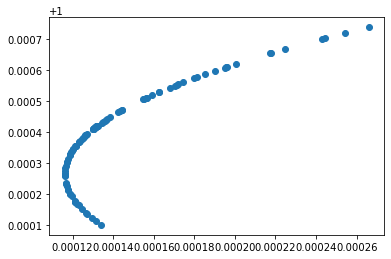

In [9]:
# Simulating efficient frontier
import matplotlib.pyplot as plt
samples = 100
x = []
y = []
for i in range(0, samples):
    rand = np.random.rand(N)
    portfolio = rand/np.sum(rand)
    y.append(np.dot(portfolio, expected_returns))
    x.append(np.dot(np.dot(portfolio.T, return_covariances), portfolio))

plt.scatter(x, y)
plt.show()